# Importing Libraries and Datasets

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import warnings

warnings.filterwarnings("ignore")


def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    fxn()


In [3]:
# Load the training dataset
df_train=pd.read_csv('./train.csv')
df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [4]:
# Load the testing data
df_test=pd.read_csv('./test.csv')
df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


# Statistical Analysis

In [5]:
df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [6]:
df_train.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [7]:
# Getting dataframe info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [8]:
# Get the statistical summary of the dataframe
df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [9]:
# Checking if null values exist
df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [10]:
# Get the number of unique values in the "profile pic" feature
df_train['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [11]:
# Get the number of unique values in "fake" (Target column)
df_train['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

# Data Visualization

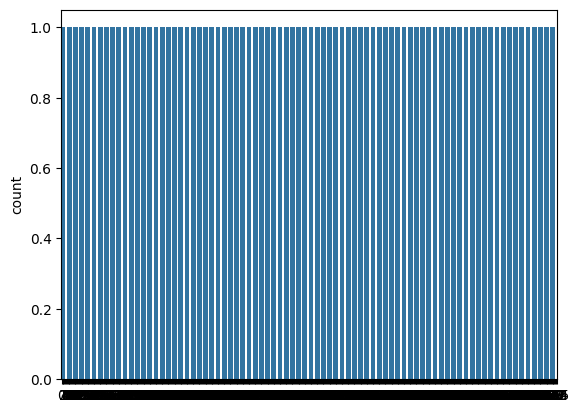

In [12]:
# Visualize the data
sns.countplot(df_train['fake'])
plt.show()

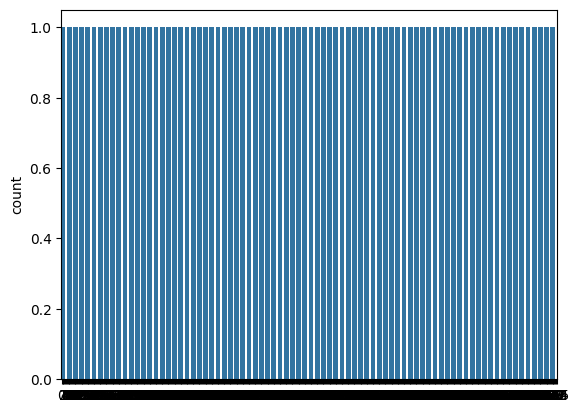

In [13]:
# Visualize the private column data
sns.countplot(df_train['private'])
plt.show()

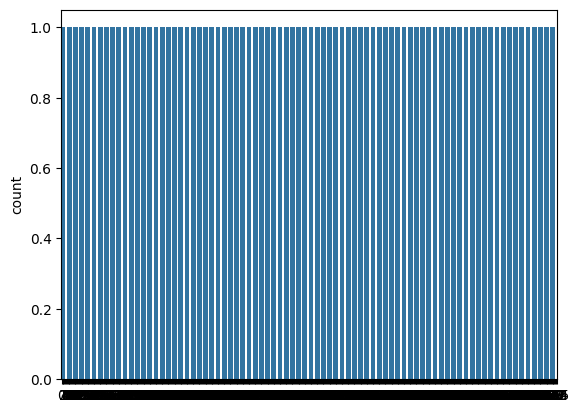

In [14]:
# Visualize the "profile pic" column data
sns.countplot(df_train['profile pic'])
plt.show()

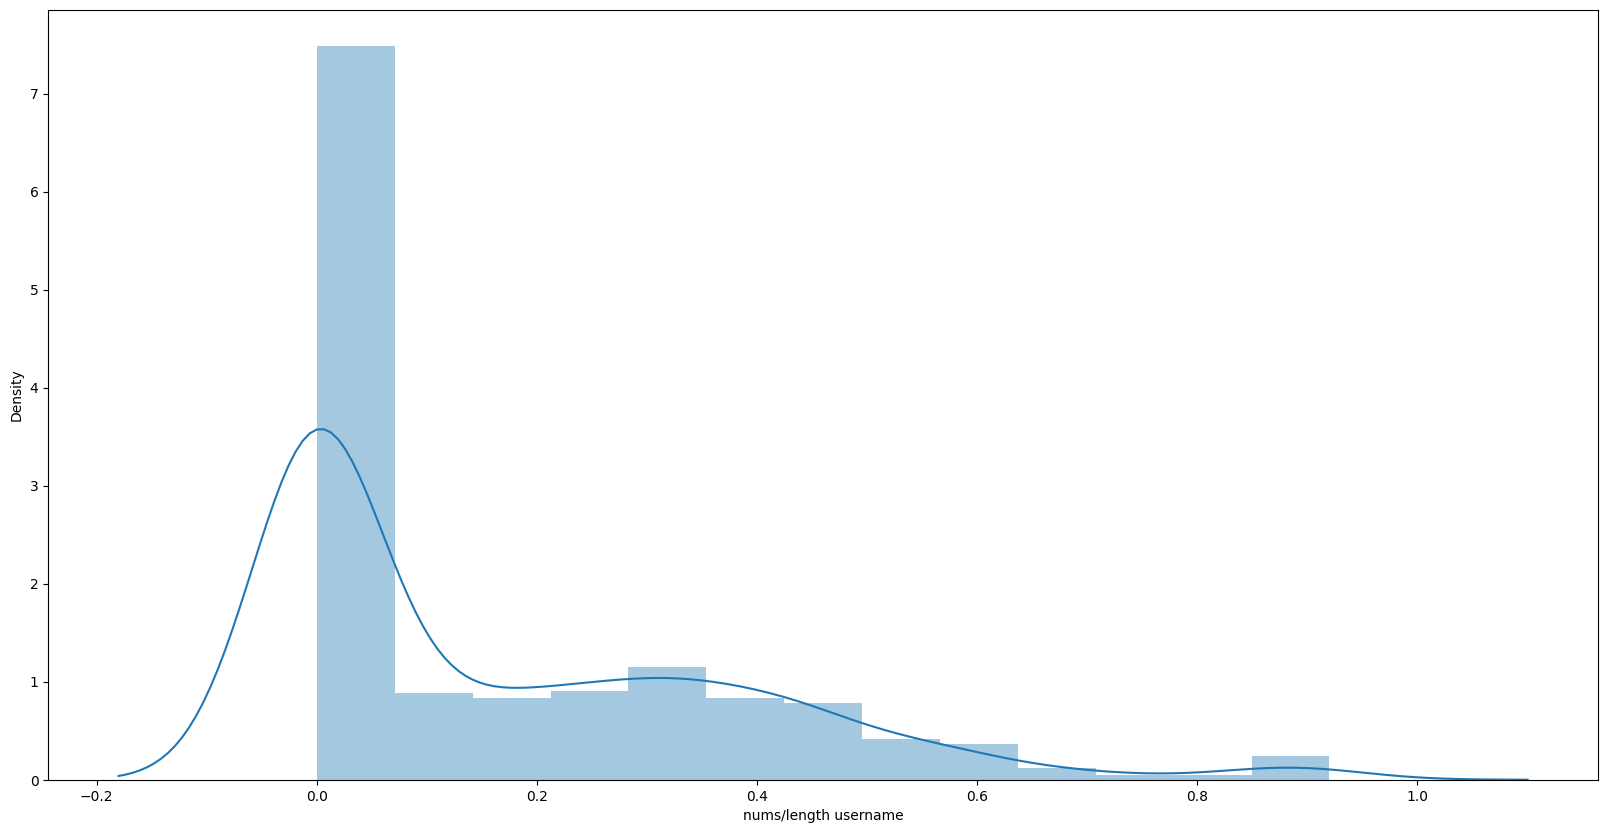

In [15]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.distplot(df_train['nums/length username'])
plt.show()

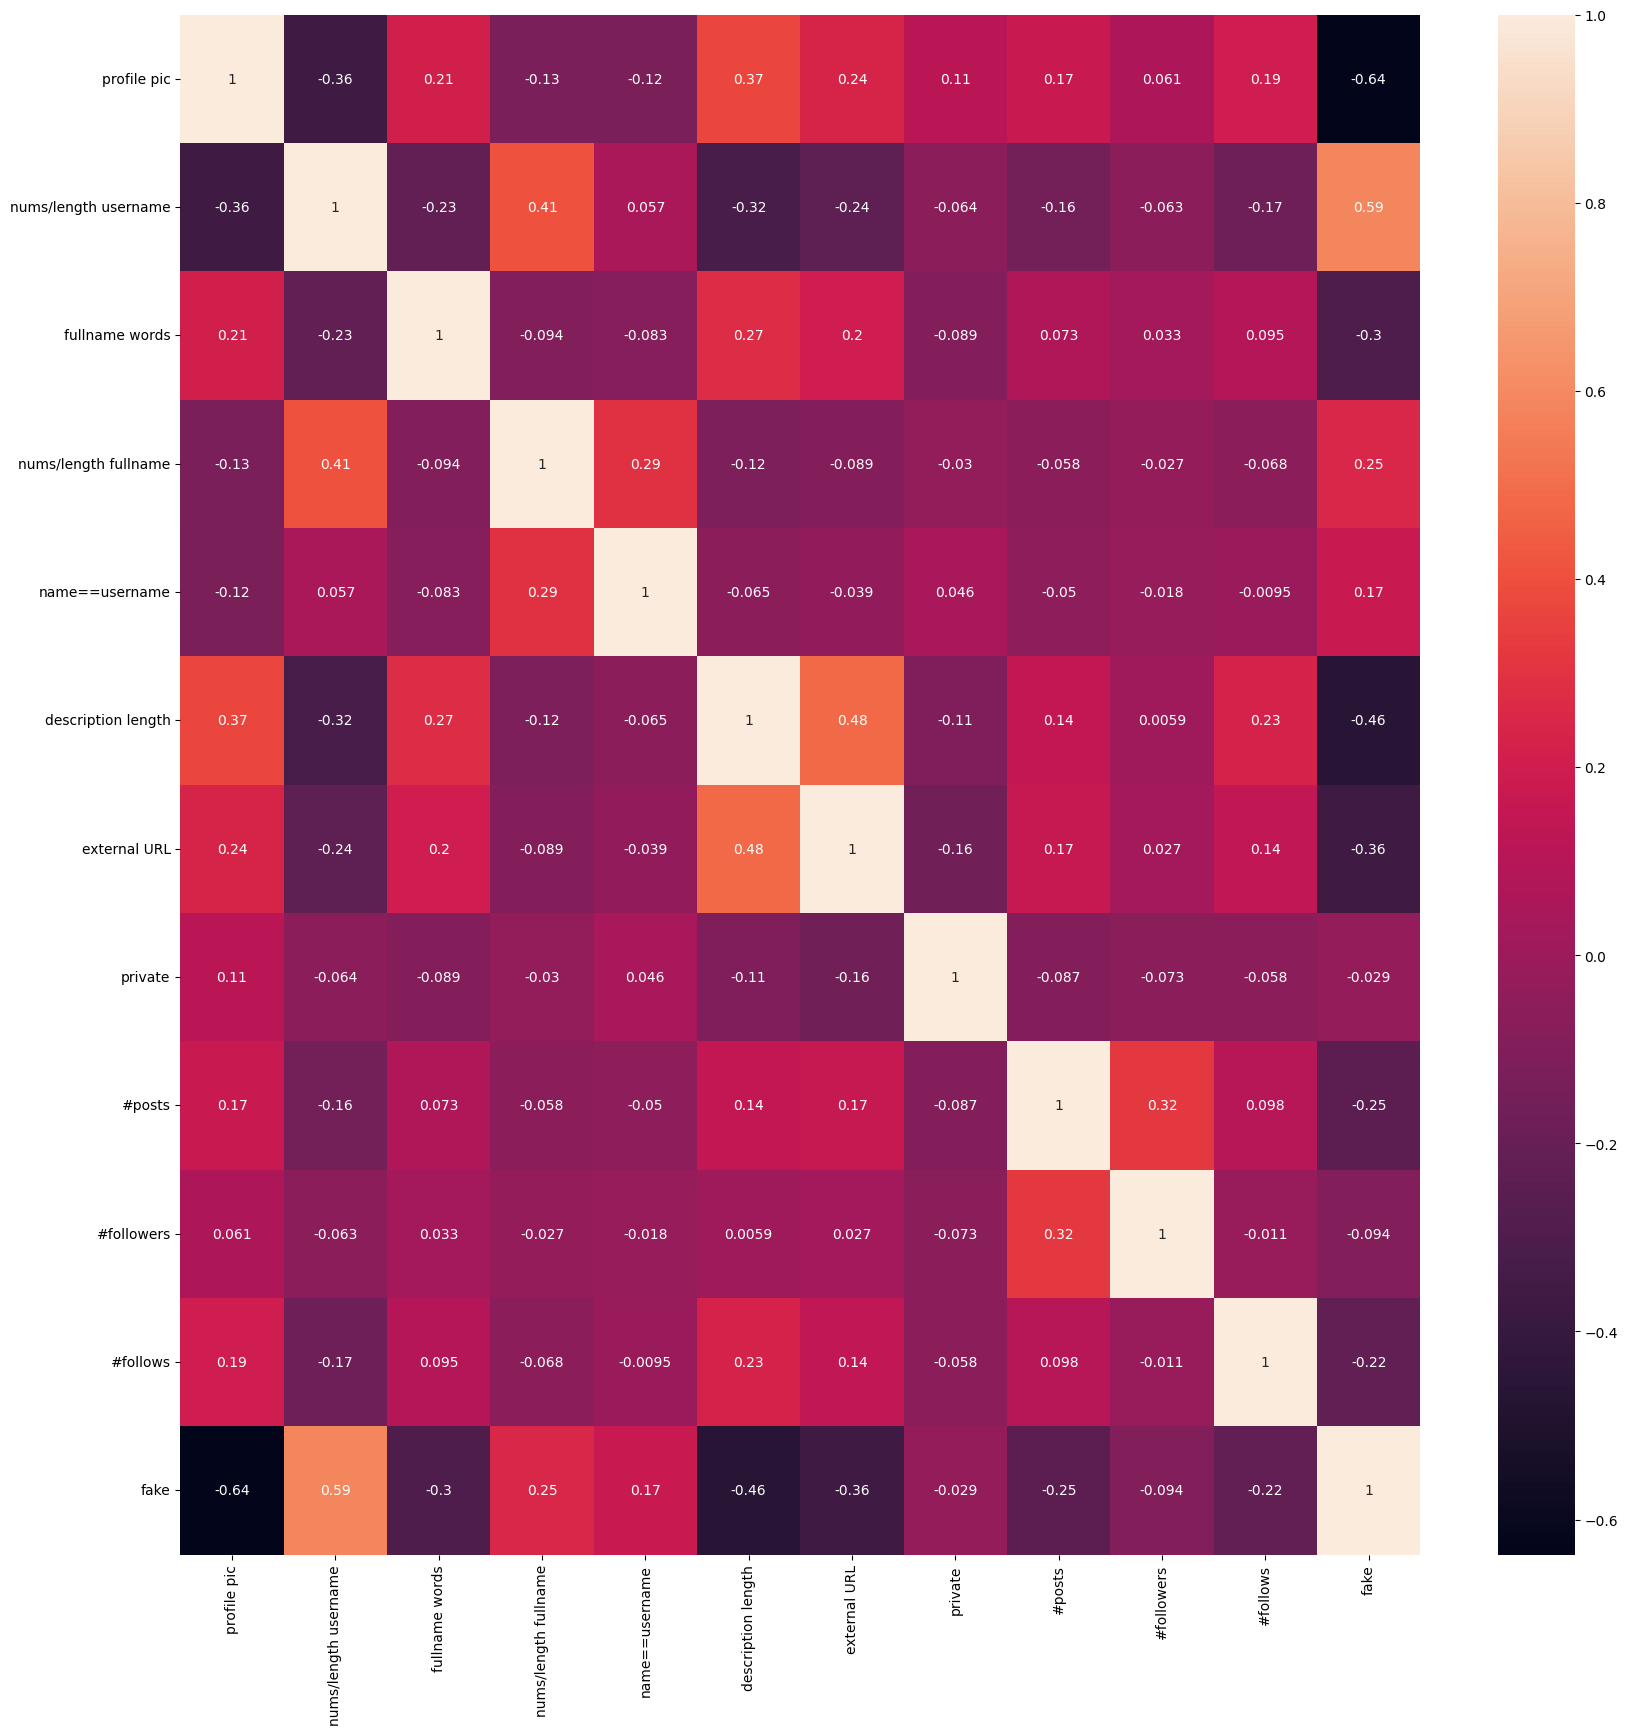

In [16]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
plt.show()

# Data Modelling

In [17]:
# Training and testing dataset (inputs)
X_train = df_train.drop(columns = ['fake'])
X_test = df_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [18]:
# Training and testing dataset (Outputs)
y_train = df_train['fake']
y_test = df_test['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [19]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#  Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [21]:

dt_predicted = dt.predict(X_test)

dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Confusion Matrix:")
print(dt_conf_matrix)
print("\n")

print("Accuracy of model DecisionTreeClassifier:", dt_acc_score * 100, '%\n')
print("Classification Report:")
print(classification_report(y_test, dt_predicted))

Confusion Matrix:
[[54  6]
 [ 7 53]]


Accuracy of model DecisionTreeClassifier: 89.16666666666667 %

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89        60
           1       0.90      0.88      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



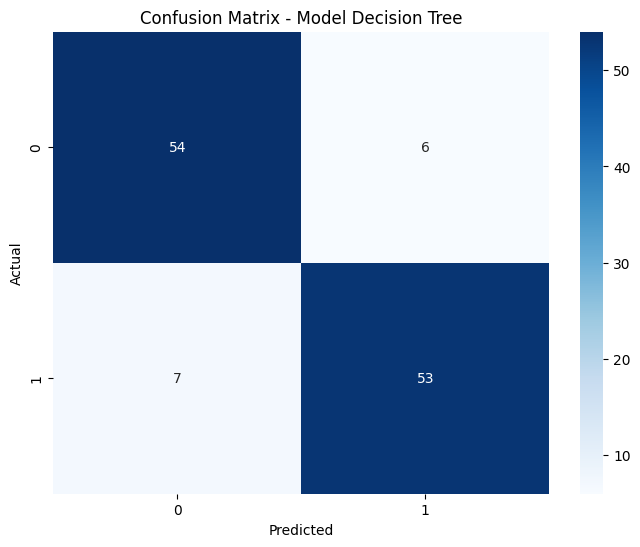

In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Heatmap dengan persentase
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, )
plt.title("Confusion Matrix - Model Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)


rf_predicted = rf.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Confusion Matrix:")
print(rf_conf_matrix)
print("\n")

print("Accuracy of model Ransom Forest Classifier:", rf_acc_score * 100, '%\n')
print("Classification Report:")
print(classification_report(y_test, rf_predicted))


#gb=GradientBoostingClassifier()

Confusion Matrix:
[[56  4]
 [ 5 55]]


Accuracy of model Ransom Forest Classifier: 92.5 %

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.93      0.92      0.92        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120



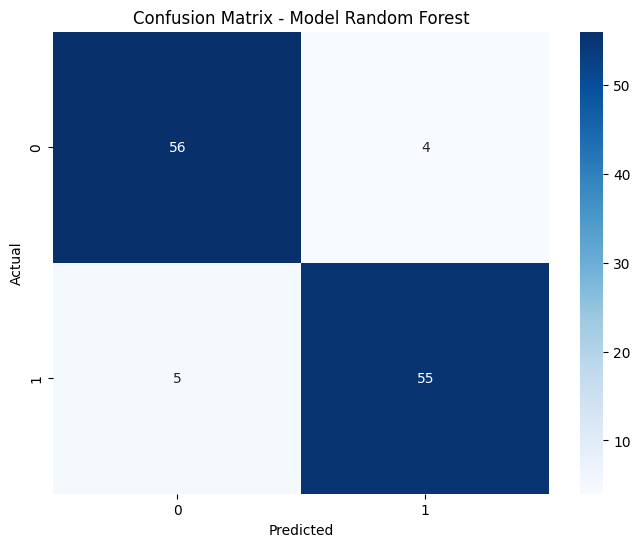

In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Heatmap dengan persentase
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, )
plt.title("Confusion Matrix - Model Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)


gb_predicted = gb.predict(X_test)

gb_conf_matrix = confusion_matrix(y_test, gb_predicted)
gb_acc_score = accuracy_score(y_test, gb_predicted)
print("Confusion Matrix:")
print(gb_conf_matrix)
print("\n")

print("Accuracy of model Gradient Boosting Classifier:", gb_acc_score * 100, '%\n')
print("Classification Report:")
print(classification_report(y_test, gb_predicted))

Confusion Matrix:
[[56  4]
 [ 6 54]]


Accuracy of model Gradient Boosting Classifier: 91.66666666666666 %

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.93      0.90      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



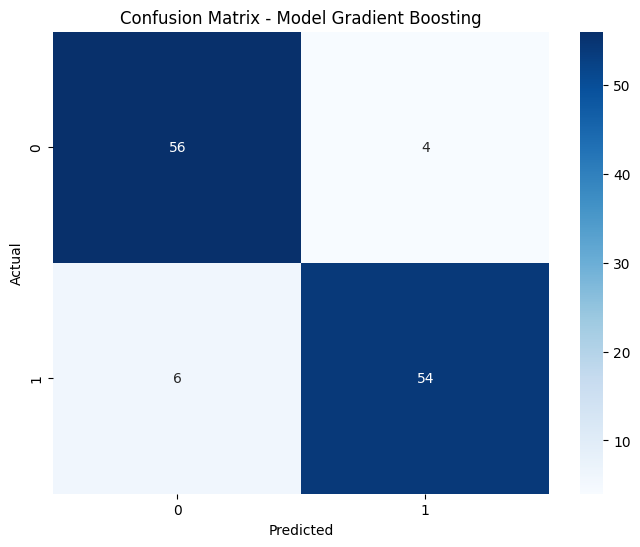

In [26]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Heatmap dengan persentase
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, )
plt.title("Confusion Matrix - Model Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
pickle.dump(gb,open('model.pkl','wb'))